Kmeans Clustering on main data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1. Importing Dataset

In [2]:
df = pd.read_excel(r"E:\Internship\Deepspatial.AI\Model building\sims_school_profile_synthetic_500.xlsx")
df.head()

,school_id,school_name,cluster/block,district,latitude,longitude,school_type (primary / upper primary / secondary),management_type (Govt / Aided / Private),grades_offered,num_students_total,...,num_classrooms,electricity_available 0/1,electricity_available (Yes/No),internet_available 0/1,internet_available (Yes/No),smart_classrooms available 0/1,smart_classrooms available,public_transport_availability 0/1,public_transport_availability,DRI Index
0,SCH00001-HSAH,Vidya Kanyakumari Upper Primary School,South Block,Kanyakumari,8.084400,77.549500,primary,Govt,1-5,339,...,7,1,Yes,1,Yes,0,No,0,No,0.50
1,SCH00002-0T9N,Cambridge Erode Model School,Hill Block,Erode,35.759179,77.761242,primary,Govt,1-5,109,...,14,1,Yes,0,No,0,No,1,Yes,0.50
2,SCH00003-MYZY,Sri Madurai Public School,North Block,Madurai,36.571424,92.804214,upper primary,Aided,1-8,509,...,14,1,Yes,1,Yes,1,Yes,1,Yes,1.00
3,SCH00004-XO6Q,Oxford Thanjavur Upper Primary School,West Block,Thanjavur,30.503997,74.642394,upper primary,Private,6-8,364,...,18,1,Yes,1,Yes,1,Yes,1,Yes,1.00
4,SCH00005-NVQJ,Government Ranipet Matriculation School,Hill Block,Ranipet,12.011621,82.311959,primary,Private,1-5,124,...,7,1,Yes,1,Yes,0,No,1,Yes,0.75


2. Ploting the dataset

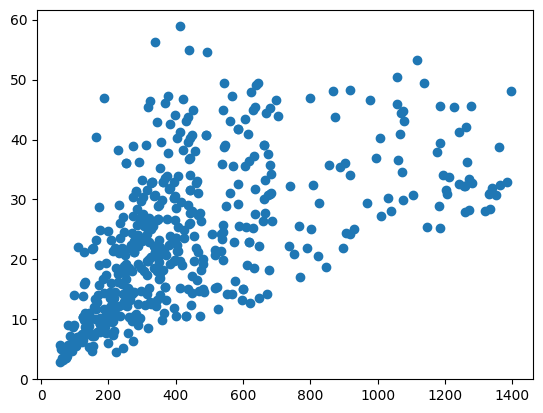

In [3]:
plt.scatter(df["num_students_total"], df["student_teacher_ratio"])
plt.show()

3. Scaling the Dataset using MinMax Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=["num_students_total","student_teacher_ratio","DRI Index","num_classrooms"])
df_scaled[["num_students_total","student_teacher_ratio","DRI Index","num_classrooms"]] = scaler.fit_transform(df[["num_students_total","student_teacher_ratio","DRI Index","num_classrooms"]])
df_scaled.head()

,num_students_total,student_teacher_ratio,DRI Index,num_classrooms
0,0.211352,0.328014,0.50,0.095238
1,0.039582,0.071579,0.50,0.261905
2,0.338312,0.382433,1.00,0.261905
3,0.230022,0.332014,1.00,0.357143
4,0.050784,0.134387,0.75,0.095238


4.1 Deciding the number of K using Elbow Method

In [6]:
# sse = Sum of Squared Errors
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(df_scaled[["num_students_total","student_teacher_ratio","DRI Index","num_classrooms"]])
    sse.append(km.inertia_)

sse

[98.60940475594424,
 63.66929111720847,
 49.60355642031058,
 40.038558719879255,
 34.31919989689279,
 29.53884202651397,
 27.373810945572714,
 25.329842773601243,
 23.40451031207025]

4.2 Ploting the Elbow graph

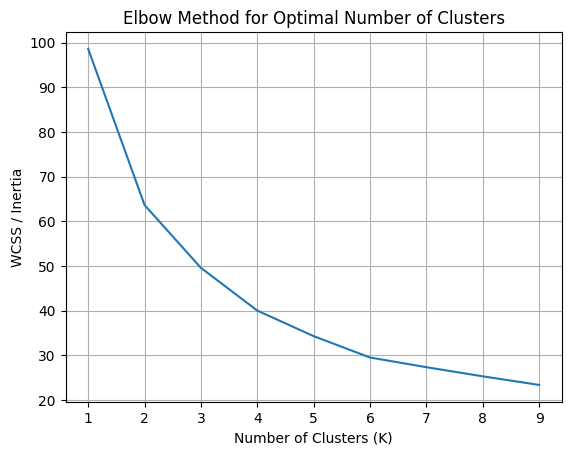

In [7]:
plt.plot(k_rng, sse)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.grid(True)
plt.show()

K = 4 is the optimal choice here.

Elbow ≠ lowest point, Elbow = sharp bend

The point where the decrease in WCSS starts slowing down sharply

WCSS = Within-Cluster Sum of Squares

WCSS measures how compact (tight) the clusters are.

5.1 Training Main KMeans Model

In [8]:
km = KMeans(n_clusters=4, n_init=20, random_state=42)
km.fit(df_scaled[["num_students_total","student_teacher_ratio","DRI Index","num_classrooms"]])
df_scaled["Cluster"] = km.labels_
df_scaled.head()

,num_students_total,student_teacher_ratio,DRI Index,num_classrooms,Cluster
0,0.211352,0.328014,0.50,0.095238,3
1,0.039582,0.071579,0.50,0.261905,3
2,0.338312,0.382433,1.00,0.261905,1
3,0.230022,0.332014,1.00,0.357143,1
4,0.050784,0.134387,0.75,0.095238,1


5.2 Finding Inertia

Inertia is the sum of squared distances between each data point and its assigned cluster centroid in KMeans clustering.

Shows cluster compactness

In [9]:
km.inertia_

40.038558719879255

Inertia is the same thing as WCSS.

It measures how tightly data points are grouped inside clusters.

Lower inertia = better, tighter clusters

5.3 Defining the random centers (centroids) of each cluster

In [10]:
centroids = km.cluster_centers_
centroids

array([[0.32626045, 0.62330753, 0.54656863, 0.32679739],
       [0.18886696, 0.25738022, 0.82738095, 0.29903628],
       [0.73871759, 0.54844279, 0.6461039 , 0.711812  ],
       [0.16097273, 0.24045669, 0.43137255, 0.26283847]])

K = 4 → asked KMeans to create 4 clusters

used 4 features for clustering

Matrix shape = (number of clusters × number of features) = 4x4

5.4 Adding "Cluster" column in the dataset

In [11]:
df["Cluster"] = km.labels_
df.head()

,school_id,school_name,cluster/block,district,latitude,longitude,school_type (primary / upper primary / secondary),management_type (Govt / Aided / Private),grades_offered,num_students_total,...,electricity_available 0/1,electricity_available (Yes/No),internet_available 0/1,internet_available (Yes/No),smart_classrooms available 0/1,smart_classrooms available,public_transport_availability 0/1,public_transport_availability,DRI Index,Cluster
0,SCH00001-HSAH,Vidya Kanyakumari Upper Primary School,South Block,Kanyakumari,8.084400,77.549500,primary,Govt,1-5,339,...,1,Yes,1,Yes,0,No,0,No,0.50,3
1,SCH00002-0T9N,Cambridge Erode Model School,Hill Block,Erode,35.759179,77.761242,primary,Govt,1-5,109,...,1,Yes,0,No,0,No,1,Yes,0.50,3
2,SCH00003-MYZY,Sri Madurai Public School,North Block,Madurai,36.571424,92.804214,upper primary,Aided,1-8,509,...,1,Yes,1,Yes,1,Yes,1,Yes,1.00,1
3,SCH00004-XO6Q,Oxford Thanjavur Upper Primary School,West Block,Thanjavur,30.503997,74.642394,upper primary,Private,6-8,364,...,1,Yes,1,Yes,1,Yes,1,Yes,1.00,1
4,SCH00005-NVQJ,Government Ranipet Matriculation School,Hill Block,Ranipet,12.011621,82.311959,primary,Private,1-5,124,...,1,Yes,1,Yes,0,No,1,Yes,0.75,1


6.1 Ploting the clusters

<Axes: xlabel='num_students_total', ylabel='student_teacher_ratio'>

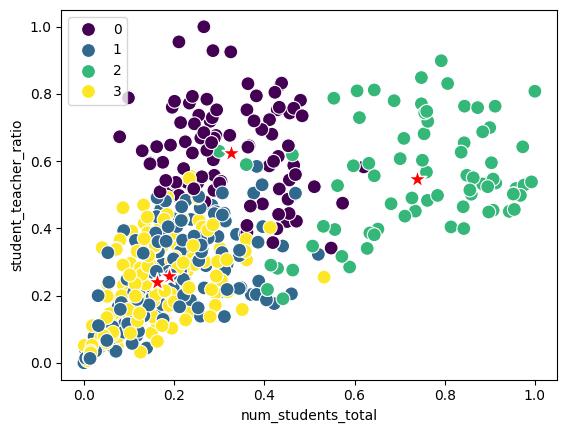

In [12]:
sns.scatterplot(df_scaled, x="num_students_total", y="student_teacher_ratio", palette="viridis", s=100, hue="Cluster")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=200, color="red", marker="*")

# Data Analysis

In [13]:
# Counting the total data points of each cluster
cluster_counts = df["Cluster"].value_counts().sort_values()
cluster_counts

Cluster
2     77
0    102
3    153
1    168
Name: count, dtype: int64

7.1 Cluster Comparison

In [14]:
analysis_features = ["student_teacher_ratio","DRI Index","num_classrooms"]

In [15]:
# Finding the mean of anchor feature
cluster_summary = (df.groupby("Cluster")[analysis_features].mean().round())
print("Mean of Anchor Features: \n")
cluster_summary

Mean of Anchor Features: 



,student_teacher_ratio,DRI Index,num_classrooms
Cluster,,,
0,38.0,1.0,17.0
1,17.0,1.0,16.0
2,34.0,1.0,33.0
3,16.0,0.0,14.0


In [16]:
# Finding the median of anchor feature
cluster_summary = (df.groupby("Cluster")[analysis_features].median().round())
print("Meadian of Anchor Features: \n")
cluster_summary

Meadian of Anchor Features: 



,student_teacher_ratio,DRI Index,num_classrooms
Cluster,,,
0,38.0,0.0,16.0
1,17.0,1.0,14.0
2,33.0,1.0,32.0
3,16.0,0.0,13.0


When mean and median are the same, it’s a strong signal that the pattern is real and not driven by outliers.

Here we can see that there not big difference between Mean and Median values

**7.2 Analyze each cluster one by one with the Anchor DRI Index**

DRI Index meaning reminder:

0.00 – 0.25 → Very low readiness

0.50 → Medium readiness

0.75 → High readiness

1.00 → Very high / fully developed

In [17]:
print("Cluster 0")
cluster_0_scl = df[df["Cluster"] == 0]
cluster_0_scl["DRI Index"].value_counts()

Cluster 0


DRI Index
0.50    48
0.75    32
0.25    19
1.00     3
Name: count, dtype: int64

**↑ Cluster 0 : represents moderately developed schools with mixed infrastructure, indicating uneven digital readiness.**

In [18]:
print("Cluster 1")
cluster_1_scl = df[df["Cluster"] == 1]
cluster_1_scl["DRI Index"].value_counts()

Cluster 1


DRI Index
0.75    116
1.00     52
Name: count, dtype: int64

**↑ Cluster 1 : represents highly developed schools with strong and consistent digital infrastructure.**

In [19]:
print("Cluster 2")
cluster_2_scl = df[df["Cluster"] == 2]
cluster_2_scl["DRI Index"].value_counts()

Cluster 2


DRI Index
0.75    36
0.50    26
1.00     8
0.25     7
Name: count, dtype: int64

**↑ Cluster 2 : represents developing schools that are transitioning toward higher digital readiness.**

In [20]:
print("Cluster 3")
cluster_3_scl = df[df["Cluster"] == 3]
cluster_3_scl["DRI Index"].value_counts()

Cluster 3


DRI Index
0.50    113
0.25     38
0.00      2
Name: count, dtype: int64

**↑ Cluster 3 : represents underdeveloped schools with low digital and infrastructure readiness.**

Overall Cluster Characterization Based on DRI Index

| Cluster | Dominant DRI | Nature                       |
| ------- | ------------ | ---------------------------- |
| 0       | 0.50–0.75    | Moderately developed, uneven |
| 1       | 0.75–1.00    | Highly developed             |
| 2       | 0.50–0.75    | Developing / transitional    |
| 3       | 0.25–0.50    | Underdeveloped               |


In [21]:
import folium

# Center the map
m = folium.Map(
    location=[df.latitude.mean(), df.longitude.mean()],
    zoom_start=6
)

# Color per cluster
cluster_colors = {
    0: "red",
    1: "green",
    2: "blue",
    3: "orange"
}

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=cluster_colors[row["Cluster"]],
        fill=True,
        fill_opacity=0.7,
        popup=f"""
        School ID: {row['school_id']}<br>  
        School Name: {row['school_name']}<br>
        District: {row['district']}<br>
        Cluster: {row['Cluster']}<br>
        STR: {row['student_teacher_ratio']}<br>
        DRI: {row['DRI Index']}
        """
    ).add_to(m)

m

**7.3 Analyse Cluster by Finding the Standard Deviation of student_teacher_ratio**

Low STD = homogeneous cluster = Schools inside the cluster behave similarly.

High STD = heterogeneous cluster = Schools inside the cluster behave very differently.

In [22]:
cluster_0_scl["student_teacher_ratio"].std().round()

np.float64(8.0)

In [23]:
cluster_1_scl["student_teacher_ratio"].std().round()

np.float64(8.0)

In [24]:
cluster_2_scl["student_teacher_ratio"].std().round()

np.float64(9.0)

In [25]:
cluster_3_scl["student_teacher_ratio"].std().round()

np.float64(7.0)

Cluster-wise Analysis (Anchor Features)

🟦 Cluster 0 — Overcrowded but Moderately Equipped

Mean

STR = 38 (high student load ❌)

DRI = 1.0

Classrooms = 17

Median

STR = 38 (mean ≈ median → stable)

DRI = 0.0 (important ⚠️)

Classrooms = 16

STD (STR)

8.0 → noticeable variation inside cluster

🧠 Interpretation

Schools are overcrowded

DRI mean = 1.0 but median = 0.0 → few very high DRI schools pulling mean up

Infrastructure is moderate, not high

📌 Pattern: Digitally uneven, high student pressure

_________________________________________________________________________________________________________________________________________________________________________________

🟩 Cluster 1 — Balanced & High-Quality Schools

Mean

STR = 17 (excellent ✔️)

DRI = 1.0

Classrooms = 16

Median

STR = 17

DRI = 1.0

Classrooms = 14

STD (STR)

8.0 → some variation, but acceptable

🧠 Interpretation

Best balance between students and teachers

High DRI consistently (mean = median)

Slight variation but generally stable

📌 Pattern: Well-resourced, stable schools

_________________________________________________________________________________________________________________________________________________________________________________

🟨 Cluster 2 — Large but Stressed Infrastructure

Mean

STR = 34 (high ❌)

DRI = 1.0

Classrooms = 33 (highest ✔️)

Median

STR = 33

DRI = 1.0

Classrooms = 32

STD (STR)

9.0 → highest internal inequality

🧠 Interpretation

Many classrooms but still high STR → student population is very large

DRI is high but pressure exists

Cluster is capacity-rich but demand-heavy

📌 Pattern: Scale problem, not infrastructure problem

_________________________________________________________________________________________________________________________________________________________________________________

🟥 Cluster 3 — Low Readiness but Low Pressure

Mean

STR = 16 (good ✔️)

DRI = 0.0

Classrooms = 14

Median

STR = 16

DRI = 0.0

Classrooms = 13

STD (STR)

7.0 → most consistent cluster

🧠 Interpretation

Good teacher availability

Poor digital readiness

Stable but underdeveloped

📌 Pattern: Human resources exist, digital infrastructure missing